# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [88]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data

training_file = 'traffic-data/train.p'
validation_file= 'traffic-data/test.p'
testing_file = 'traffic-data/valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [109]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = np.array(X_train).shape[0]

# TODO: Number of validation examples
n_validation = np.array(X_valid).shape[0]

# TODO: Number of testing examples.
n_test = np.array(X_test).shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (np.array(X_train).shape[1], np.array(X_train).shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validing examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validing examples = 12630
Number of testing examples = 4410
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [90]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [91]:
import csv

labels_to_name = {}

with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        labels_to_name[int(row['ClassId'])] = row['SignName']
        
print(labels_to_name)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

In [93]:
# count each signs
from collections import Counter

count_signs = Counter(y_train)
for l in count_signs.most_common():
    label = l[0]
    value = l[1]
    print("{}: {}".format(labels_to_name[label], value))

Speed limit (50km/h): 2010
Speed limit (30km/h): 1980
Yield: 1920
Priority road: 1890
Keep right: 1860
No passing for vehicles over 3.5 metric tons: 1800
Speed limit (70km/h): 1770
Speed limit (80km/h): 1650
Road work: 1350
No passing: 1320
Speed limit (100km/h): 1290
Speed limit (60km/h): 1260
Speed limit (120km/h): 1260
Right-of-way at the next intersection: 1170
General caution: 1080
Ahead only: 1080
No entry: 990
Stop: 690
Wild animals crossing: 690
Turn right ahead: 599
No vehicles: 540
Traffic signals: 540
Children crossing: 480
Slippery road: 450
Beware of ice/snow: 390
End of speed limit (80km/h): 360
Vehicles over 3.5 metric tons prohibited: 360
Turn left ahead: 360
Bumpy road: 330
Go straight or right: 330
Dangerous curve to the right: 300
Roundabout mandatory: 300
Double curve: 270
Keep left: 270
Road narrows on the right: 240
Bicycles crossing: 240
Pedestrians: 210
End of all speed and passing limits: 210
End of no passing: 210
End of no passing by vehicles over 3.5 metric 

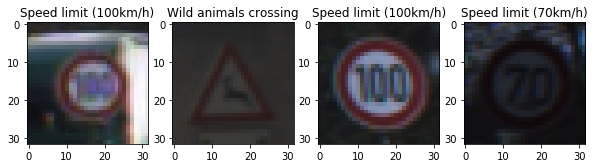

In [92]:
import random

fig, ax = plt.subplots(1, 4)
fig.subplots_adjust(hspace=0.5)
fig.set_size_inches(10, 10)

for i in range(0, 4):
    n = random.randint(0, n_train)
    
    img = X_train[n]
    ax[i].set_title(labels_to_name[y_train[n]])
    ax[i].imshow(img)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [97]:
# Define util functions to augment

from scipy.ndimage import rotate
from scipy.ndimage import zoom
from scipy.misc import face
from matplotlib import pyplot as plt

from sklearn.utils import shuffle

# ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

def whitening(X_train, y_train):

    datagen = ImageDataGenerator(
        zca_whitening=True)

    # reshape to be [samples][pixels][width][height]
    train_data = np.copy(X_train)
    #train_data = train_data.reshape(train_data.shape[0], 1, 32, 32)
    train_data = train_data.astype('float32')

    y_train_data = np.copy(y_train)

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(train_data)

    batches = 0
    batch_size = 32

    whitening_images = np.array(np.zeros((train_data.shape[0], 32, 32, 1)))
    whitening_labels = np.array(np.zeros((y_train_data.shape)))

    for x_batch, y_batch in datagen.flow(train_data, y_train_data, batch_size=batch_size):

        ini = batches * batch_size
        end = ini + x_batch.shape[0]
        whitening_images[ini:end] = x_batch #.reshape(x_batch.shape[0], 32, 32, 1)
        whitening_labels[ini:end] = y_batch

        batches += 1

        if batches >= len(train_data) / 32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break
            
    return (whitening_images, whitening_labels)


# this method was copied from
# https://stackoverflow.com/questions/37119071/scipy-rotate-and-zoom-an-image-without-changing-its-dimensions
def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # width and height of the zoomed image
    zh = int(np.round(zoom_factor * h))
    zw = int(np.round(zoom_factor * w))

    # for multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # zooming out
    if zoom_factor < 1:
        # bounding box of the clip region within the output array
        top = (h - zh) // 2
        left = (w - zw) // 2
        # zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # zooming in
    elif zoom_factor > 1:
        # bounding box of the clip region within the input array
        top = (zh - h) // 2
        left = (zw - w) // 2
        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)
        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # if zoom_factor == 1, just return the input array
    else:
        out = img
    return out

def rotate_img(img):
    #rotate the image on range of 10 to 180
    angle_rot = random.randint(10, 180)    
    return rotate(img, angle_rot, reshape=False)

# convert to grayscale
def convert_to_grayscale(data):
    return np.expand_dims(np.mean(data, axis=3), axis=3)

def normalize(data):
    x_min = np.min(data)
    x_max = np.max(data)
    a = 0
    b = 1

    normalized = np.array([a + (value - x_min) * (b - a) / (x_max - x_min) for value in data])
    
    return normalized

In [95]:
X_train = convert_to_grayscale(X_train)
X_valid = convert_to_grayscale(X_valid)
X_test = convert_to_grayscale(X_test)

# shuffle the data for plots
X_train, y_train = shuffle(X_train, y_train)

print(X_train.shape)

(34799, 32, 32, 1)


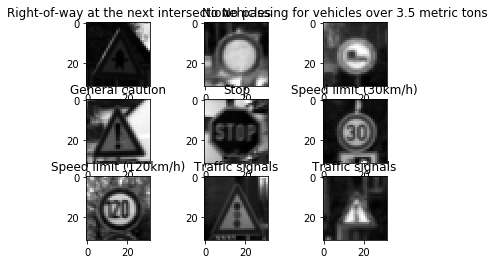

In [98]:
# shows the grayscale images
for i in range(0, 9):
    a = plt.subplot(330 + 1 + i)
    a.set_title(labels_to_name[y_train[i]])
    plt.imshow(X_train[i].squeeze(), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [106]:
# augment the training data using zoom, rotation and whitening

rotated_images = np.array([rotate_img(x) for x in X_train])
rotated_labels = np.copy(y_train)

zoom_factor = random.uniform(1.1, 1.5)
zoom_images = np.array([clipped_zoom(x, zoom_factor) for x in X_train])
zoom_labels = np.copy(y_train)

whitening_images, whitening_labels = whitening(X_train, y_train)

/Users/matheus.souza/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


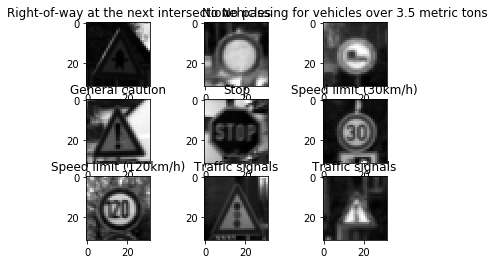

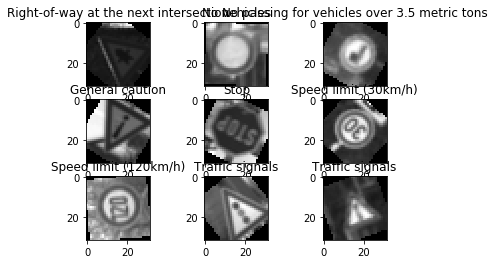

In [107]:
# shows the normal images
for i in range(0, 9):
    a = plt.subplot(330 + 1 + i)
    a.set_title(labels_to_name[y_train[i]])
    plt.imshow(X_train[i].squeeze(), cmap=plt.get_cmap('gray'))

plt.show()

# shows the rotated images
for i in range(0, 9):
    a = plt.subplot(330 + 1 + i)
    a.set_title(labels_to_name[rotated_labels[i]])
    plt.imshow(rotated_images[i].squeeze(), cmap=plt.get_cmap('gray'))

plt.show()

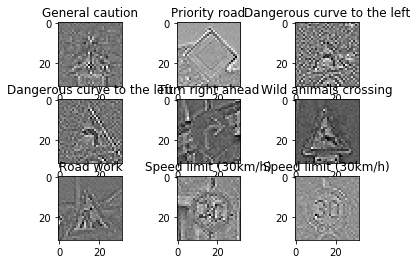

In [108]:
# create a grid of 3x3 images
# shows the whitening images
for i in range(0, 9):
    a = plt.subplot(330 + 1 + i)
    a.set_title(labels_to_name[whitening_labels[i]])
    plt.imshow(whitening_images[i].squeeze(), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

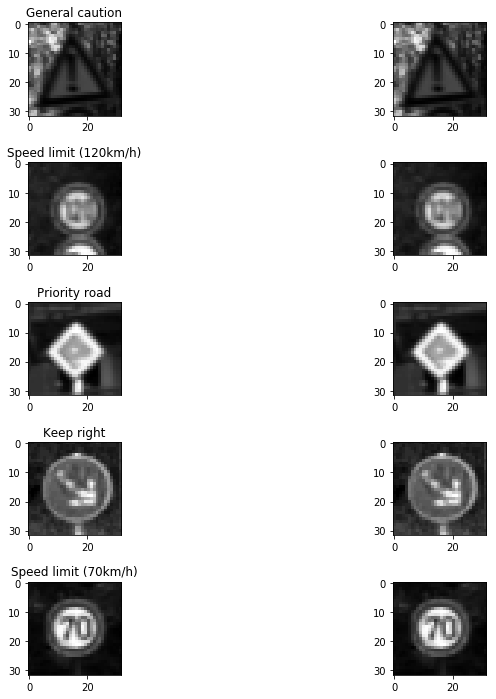

In [77]:
# shows normalize image process
def plot_normalized(x, y):
    fig, ax = plt.subplots(5, 2)
    fig.subplots_adjust(hspace=0.5)
    fig.set_size_inches(12, 12)
    
    x_norm = normalize(x)
    
    # shows normalized
    for i in range(0, 5):
        ax[i][0].set_title(labels_to_name[y[i]])
        ax[i][0].imshow(x[i].squeeze(), cmap=plt.get_cmap('gray'))
        
        ax[i][1].imshow(x_norm[i].squeeze(), cmap=plt.get_cmap('gray'))
        
    # show the plot
    plt.show()
    
plot_normalized(X_train[:5], y_train[:5])

In [78]:
def extract_validation_data(x, y, x_valid, y_valid):
    
    # 10% for validation
    validation_count = int(len(x) * 0.1)

    #validTest = np.concatenate((validTest, x[-validation_count:]))
    new_x_valid = x[-validation_count:]
    new_y_valid = y[-validation_count:]
    
    new_x = x[:-validation_count]
    new_y = y[:-validation_count]
    
    new_x_valid = np.concatenate((x_valid, new_x_valid))
    new_y_valid = np.concatenate((y_valid, new_y_valid))
    
    return (new_x, new_y, new_x_valid, new_y_valid)

In [79]:
print("current x_train", X_train.shape[0])
print("current x_valid", X_valid.shape[0])

# get a portioin of new data to validation
zoom_images, zoom_labels, X_valid, y_valid = extract_validation_data(
    zoom_images, zoom_labels, X_valid, y_valid)

print(zoom_images.shape[0])

rotated_images, rotated_labels, X_valid, y_valid = extract_validation_data(
    rotated_images, rotated_labels, X_valid, y_valid)

print(rotated_images.shape[0])

whitening_images, whitening_labels, X_valid, y_valid = extract_validation_data(
    whitening_images, whitening_labels, X_valid, y_valid)

print(whitening_images.shape[0])

# merge the X_train data and the new_images data and labels

X_train = np.concatenate((X_train, zoom_images))
y_train = np.concatenate((y_train, zoom_labels))

print("new 1", X_train.shape[0])

X_train = np.concatenate((X_train, rotated_images))
y_train = np.concatenate((y_train, rotated_labels))

print("new 2", X_train.shape[0])

X_train = np.concatenate((X_train, whitening_images))
y_train = np.concatenate((y_train, whitening_labels))

print("new 3", X_train.shape[0])

# update the the number of training

print("new x_train", X_train.shape[0])
print("new x_valid", X_valid.shape[0])

current x_train 34799
current x_valid 12630
31320
31320
31320
new 1 66119
new 2 97439
new 3 128759
new x_train 128759
new x_valid 23067


In [80]:
# normalize the data to mean zero (min:-1 and max:1)
print(np.min(X_train))
print(np.max(X_train))

X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

print(np.min(X_train))
print(np.max(X_train))
print(X_train.shape)

-21.2210731506
286.294537096
0.0
1.0
(128759, 32, 32, 1)


In [81]:
# save the processed  data for checkpoint

pickle.dump((X_train, y_train, 
             X_valid, y_valid, 
             X_test, y_test, 
             labels_to_name), open('processed_data.p', 'wb'))

In [82]:
# checkpoint!

import pickle
import numpy as np
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import csv
from sklearn.utils import shuffle
import tensorflow as tf

# Load the Preprocessed Validation data
X_train, y_train, X_valid, y_valid, X_test, y_test, labels_to_name = pickle.load(open('processed_data.p', mode='rb'))

n_classes = len(set(y_train))

print(X_train.shape)
print(n_classes)

(128759, 32, 32, 1)
43


In [17]:
from distutils.version import LooseVersion
import warnings

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0


### Model Architecture

In [124]:
from tensorflow.contrib.layers import flatten

def conv2d_max(X, W, b, strides=[1, 1, 1, 1], padding='VALID'):
    conv = tf.nn.conv2d(X, W, strides=strides, padding=padding) + b
    conv = tf.nn.relu(conv)
    conv = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    return conv
    

def conv_net(x, keep_prob):
    
    mu = 0
    sigma = 0.1
    
    weights = {
        'wc1': tf.Variable(tf.truncated_normal((5, 5, 1, 6), mean=mu, stddev=sigma)), # 6@14x14
        'wc2': tf.Variable(tf.truncated_normal((5, 5, 6, 16), mean=mu, stddev=sigma)), # 16@5x5
        'wf1': tf.Variable(tf.truncated_normal((400, 512), mean=mu, stddev=sigma)),
        'wf2': tf.Variable(tf.truncated_normal((512, 120), mean=mu, stddev=sigma)),
        'wf3': tf.Variable(tf.truncated_normal((120, 84), mean=mu, stddev=sigma)),          
        'out': tf.Variable(tf.truncated_normal((84, n_classes), mean=mu, stddev=sigma))
    }

    biases = {
        'bc1': tf.Variable(tf.zeros([6])), 
        'bc2': tf.Variable(tf.zeros([16])),
        'bf1': tf.Variable(tf.zeros([512])),   
        'bf2': tf.Variable(tf.zeros([120])),         
        'bf3': tf.Variable(tf.zeros([84])), 
        'out': tf.Variable(tf.zeros([n_classes]))
    }
    
    conv1 = conv2d_max(x, weights['wc1'], biases['bc1'])    
    dropout = tf.nn.dropout(conv1, keep_prob)
    print(dropout.get_shape())

    conv2 = conv2d_max(conv1, weights['wc2'], biases['bc2'])
    dropout = tf.nn.dropout(conv2, keep_prob)
    print(dropout.get_shape())

    f = flatten(dropout)
    print(f.get_shape())
    
    fc1 = tf.matmul(f, weights['wf1']) + biases['bf1']
    fc1 = tf.nn.relu(fc1)
    dropout = tf.nn.dropout(fc1, keep_prob)
    print(dropout.get_shape())

    fc2 = tf.matmul(dropout, weights['wf2']) + biases['bf2']
    fc2 = tf.nn.relu(fc2)
    dropout = tf.nn.dropout(fc2, keep_prob)
    print(dropout.get_shape())
    
    
    fc3 = tf.matmul(dropout, weights['wf3']) + biases['bf3']
    fc3 = tf.nn.relu(fc3)
    dropout = tf.nn.dropout(fc3, keep_prob)
    print(dropout.get_shape())

    logits = tf.matmul(dropout, weights['out']) + biases['out']
    
    return logits, conv1, conv2

In [125]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 1), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')
one_hot_y = tf.one_hot(y, n_classes)

In [126]:
#hyperparameters
learning_rate = 0.001
epochs = 50
batch_size = 128
keep_probability = 0.7

#91/92 > 0.0005, 40, 128, 0.6

In [127]:
logits, conv1, conv2 = conv_net(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate)
training_operation = optimizer.minimize(loss_operation)


(?, 14, 14, 6)
(?, 5, 5, 16)
(?, 400)
(?, 512)
(?, 120)
(?, 84)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [121]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [128]:
saver = tf.train.Saver()

# argmax(input, axis) -> Returns the index with the largest value across axes of a tensor.

# check if the largest probability in logits represents the correct label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1)) 
# count the true values (correct prediction)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [23]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:keep_probability})

        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.660

EPOCH 2 ...
Validation Accuracy = 0.766

EPOCH 3 ...
Validation Accuracy = 0.825

EPOCH 4 ...
Validation Accuracy = 0.855

EPOCH 5 ...
Validation Accuracy = 0.872

EPOCH 6 ...
Validation Accuracy = 0.882

EPOCH 7 ...
Validation Accuracy = 0.896

EPOCH 8 ...
Validation Accuracy = 0.896

EPOCH 9 ...
Validation Accuracy = 0.908

EPOCH 10 ...
Validation Accuracy = 0.905

EPOCH 11 ...
Validation Accuracy = 0.913

EPOCH 12 ...
Validation Accuracy = 0.917

EPOCH 13 ...
Validation Accuracy = 0.923

EPOCH 14 ...
Validation Accuracy = 0.918

EPOCH 15 ...
Validation Accuracy = 0.916

EPOCH 16 ...
Validation Accuracy = 0.922

EPOCH 17 ...
Validation Accuracy = 0.929

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.935

EPOCH 20 ...
Validation Accuracy = 0.934

EPOCH 21 ...
Validation Accuracy = 0.935

EPOCH 22 ...
Validation Accuracy = 0.935

EPOCH 23 ...
Validation Accuracy = 0.937

EPOCH 24 ...
Validation Accura

In [24]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.954


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

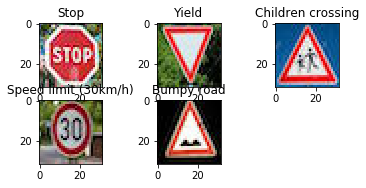

In [110]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg

def get_data_test():
    x = [
        mpimg.imread('internet_images/stop.jpg'),
        mpimg.imread('internet_images/yield.jpg'),
        mpimg.imread('internet_images/children.jpg'),
        mpimg.imread('internet_images/max_speed_30.jpg'),
        mpimg.imread('internet_images/bumpy.jpg')
    ]
    y = [
        14, 13, 28, 1, 22
    ]
    return x, y

x_data_test, y_data_test = get_data_test()

for i in range(0, 5):
    a = plt.subplot(330 + 1 + i)
    a.set_title(labels_to_name[y_data_test[i]])
    plt.imshow(x_data_test[i])

plt.show()

### Predict the Sign Type for Each Image

In [111]:
from collections import Counter

def print_precision_and_recall(y, pred):
    bool_predictions = np.equal(y, pred)
    
    c_true_pos = Counter()
    
    for i in range(len(y)):
        label = y[i]        
        if bool_predictions[i]:
            c_true_pos.update({label: 1})
    
    total_pos_pred_by_sign = Counter(pred)
    # total true elements in data set
    false_neg_by_sign = Counter(y)
    
    # gets the labels sorted
    labels = sorted(set(y))
    
    print()
    print("true_positive / false_positive")
    
    # precision
    # measure of exactness or quality (best case is no false positives)
    for i in labels:        
        tp = c_true_pos[i]
        fp = total_pos_pred_by_sign[i]
        if fp > 0:
            # total pred positives - true positives
            error = fp - tp
            precision = tp / fp
            print ("precision of {:} is {:.2f} Correct: {:} - Error: {:} - {:}"
                   .format(i, precision, tp, error, labels_to_name[i]))
        else: # nothing correct
            print("precision of {:} is {:.2f}  {:}".format(i, 0, labels_to_name[i]))

    print()
    print("true_positive / false_negative")
    
    # recall
    # measure of completeness or quantity (best case is no false negatives)
    # between all elements, how much we classify correct?
    for i in labels:
        tp = c_true_pos[i]
        fn = false_neg_by_sign[i]
        
        if fn > 0:
            # total elements positives - true positives
            error = fn - tp
            recall = tp / fn
            print("recall of {:} is {:.2f} ({:}/{:}) -> Error: {:} - {:})"
                  .format(i, recall, tp, fn, error, labels_to_name[i]))

In [131]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    sess = tf.get_default_session()
    
    # check if the largest probability in logits represents the correct label
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1)) 
    # mean of true values
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    predictions = tf.argmax(logits, 1)
    accuracy, pred = sess.run([accuracy_operation, predictions], 
                        feed_dict={x: X_test, 
                                   y: y_test, keep_prob:1.0})

    print("Accuracy = {:.3f}".format(accuracy))
    
    print_precision_and_recall(y_test, pred)    

Accuracy = 0.942

true_positive / false_positive
precision of 0 is 0.88 Correct: 30 - Error: 4 - Speed limit (20km/h)
precision of 1 is 0.94 Correct: 232 - Error: 14 - Speed limit (30km/h)
precision of 2 is 0.88 Correct: 236 - Error: 31 - Speed limit (50km/h)
precision of 3 is 1.00 Correct: 145 - Error: 0 - Speed limit (60km/h)
precision of 4 is 0.94 Correct: 209 - Error: 14 - Speed limit (70km/h)
precision of 5 is 0.98 Correct: 190 - Error: 3 - Speed limit (80km/h)
precision of 6 is 1.00 Correct: 58 - Error: 0 - End of speed limit (80km/h)
precision of 7 is 0.99 Correct: 142 - Error: 2 - Speed limit (100km/h)
precision of 8 is 0.98 Correct: 129 - Error: 2 - Speed limit (120km/h)
precision of 9 is 0.97 Correct: 148 - Error: 5 - No passing
precision of 10 is 1.00 Correct: 209 - Error: 1 - No passing for vehicles over 3.5 metric tons
precision of 11 is 0.87 Correct: 146 - Error: 21 - Right-of-way at the next intersection
precision of 12 is 0.97 Correct: 210 - Error: 7 - Priority road
pre

In [132]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

x_data_test = convert_to_grayscale(x_data_test)
x_data_test = normalize(x_data_test)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    
    predictions = tf.argmax(logits, 1)
    pred = sess.run(predictions, 
                    feed_dict={x: x_data_test, 
                               y: y_data_test, keep_prob:1.0})
    
    print("Expected:  ", y_data_test)
    print("Predicted: ", pred)

Expected:   [14, 13, 28, 1, 22]
Predicted:  [14 13 28  1 22]


### Analyze Performance

In [133]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1)) 
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    accuracy = sess.run(accuracy_operation, 
                                feed_dict={x: x_data_test, 
                                           y: y_data_test, keep_prob:1.0})

    print("Accuracy = {:.3f}".format(accuracy))
    print_precision_and_recall(y_data_test, pred)      

Accuracy = 1.000

true_positive / false_positive
precision of 1 is 1.00 Correct: 1 - Error: 0 - Speed limit (30km/h)
precision of 13 is 1.00 Correct: 1 - Error: 0 - Yield
precision of 14 is 1.00 Correct: 1 - Error: 0 - Stop
precision of 22 is 1.00 Correct: 1 - Error: 0 - Bumpy road
precision of 28 is 1.00 Correct: 1 - Error: 0 - Children crossing

true_positive / false_negative
recall of 1 is 1.00 (1/1) -> Error: 0 - Speed limit (30km/h))
recall of 13 is 1.00 (1/1) -> Error: 0 - Yield)
recall of 14 is 1.00 (1/1) -> Error: 0 - Stop)
recall of 22 is 1.00 (1/1) -> Error: 0 - Bumpy road)
recall of 28 is 1.00 (1/1) -> Error: 0 - Children crossing)


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.36969754e-16,   8.64612615e-24,
          1.01504971e-24,   5.33924711e-27],
       [  1.00000000e+00,   4.52336185e-28,   1.61126451e-32,
          2.05115820e-34,   3.47249472e-37],
       [  9.97221231e-01,   2.75196019e-03,   1.61141907e-05,
          1.07141350e-05,   2.90366065e-10],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[14,  0,  1,  2,  3],
       [13, 22, 29, 26, 35],
       [28, 29, 20, 24, 23],
       [ 1,  0,  4,  2,  5],
       [22,  0,  1,  2,  3]], dtype=int32))


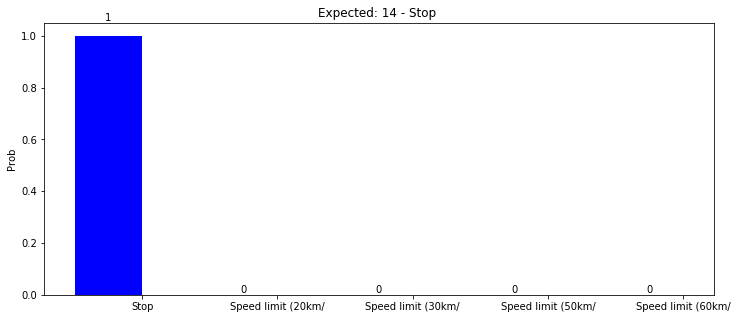

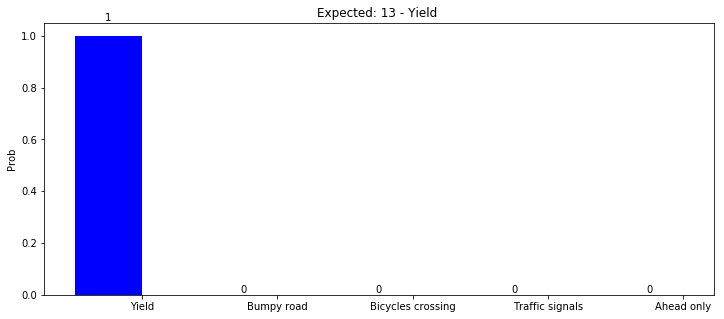

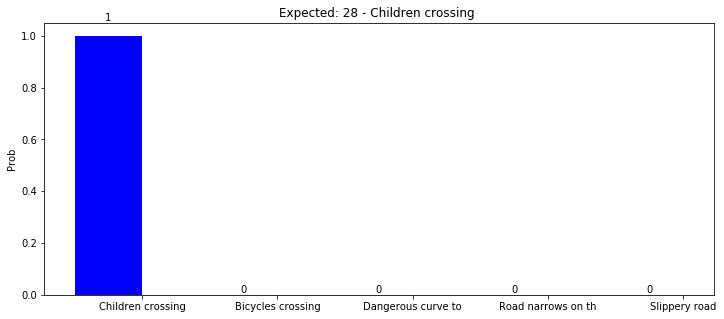

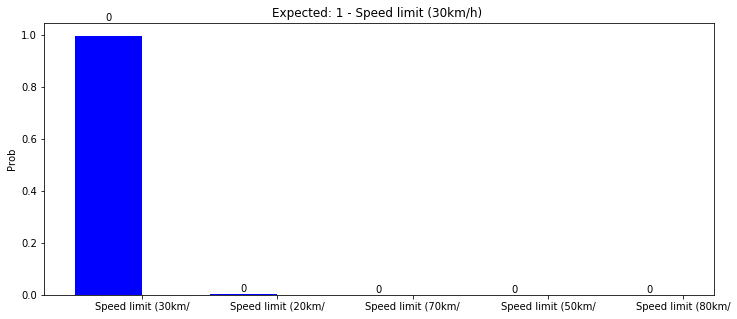

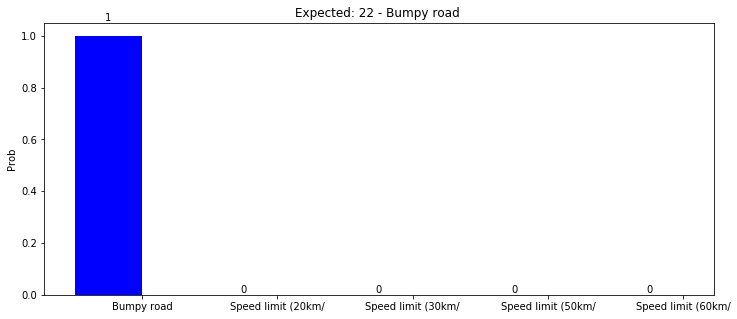

In [141]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

def plot_prabalities(softmax, expected_labels):
    probs = softmax[0]
    labels = softmax[1]
    
    for i, label in enumerate(y_data_test):
        y = probs[i]
        x = labels[i]

        N = len(y_data_test)

        ind = np.arange(N)  # the x locations for the groups
        width = 0.5       # the width of the bars

        fig, ax = plt.subplots()
        fig.set_size_inches(12, 5)
        rects1 = ax.bar(ind, y, width, color='b')
        
        x_with_names = [labels_to_name[l][:18] for l in x]

        # add some text for labels, title and axes ticks
        ax.set_ylabel('Prob')
        ax.set_title('Top 5 probabilities')
        ax.set_title("Expected: {:} - {:} ".format(expected_labels[i], labels_to_name[expected_labels[i]]))
        ax.set_xticks(ind + width / 2)
        ax.set_xticklabels(x_with_names)

        def autolabel(rects):
            """
            Attach a text label above each bar displaying its height
            """
            for rect in rects:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                        '%d' % int(height),
                        ha='center', va='bottom')

        autolabel(rects1)
        

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    
    softmax = tf.nn.softmax(logits)
    
    pred = sess.run(softmax, 
                    feed_dict={x: x_data_test, 
                               y: y_data_test, keep_prob:1.0})

    probs = sess.run(tf.nn.top_k(tf.constant(pred), k=5))
    
    print(probs)
    
    plot_prabalities(probs, y_data_test)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [142]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, sess=sess, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess, feed_dict={x : image_input, keep_prob:1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(8,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

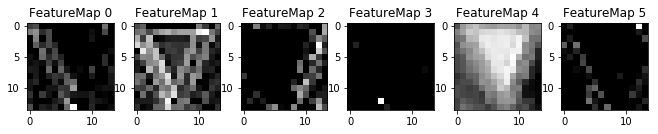

In [143]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    
    outputFeatureMap([x_data_test[1]], conv1, sess)

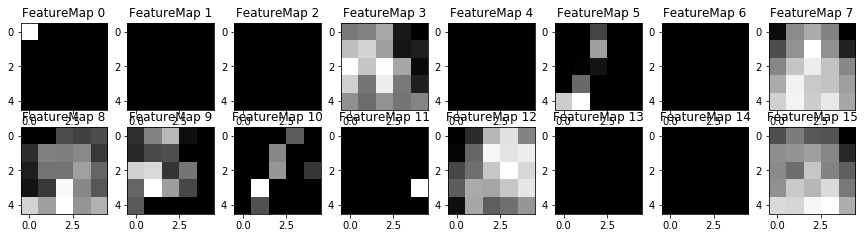

In [144]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    
    outputFeatureMap([x_data_test[2]], conv2, sess)